# MINI PROJET 1: Qui a peint ce tableau ?

In [1]:
# Utils
import os
import shutil
import time

# Maths - Stats
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import random as rd

# Data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Deep Learning Librairies
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

## Preparation du jeu de données

In [95]:

if os.path.exists("data"):
    shutil.rmtree("data")

path = "./images_hq/"
labels = []


if not os.path.exists("data"):
    os.mkdir("data")


for author_folder in os.listdir(path):
    author_path = os.path.join(path, author_folder)
    for image_filename in os.listdir(author_path):
        author_name = ""
        
        for i in range(len(image_filename.split('_')) - 1):
            author_name += image_filename.split('_')[i] 
        
        src = os.path.join(author_path, image_filename)
        dst = os.path.join("data/", image_filename)
        shutil.copyfile(src, dst)
        
       
        labels.append(author_name)


train_filename = os.listdir("data")

In [99]:

total_df = pd.DataFrame({
    'filename': train_filename,
    'category': labels
})

In [100]:
total_df.head()

,filename,category
0,Albrecht_Dürer_1.jpg,AlbrechtDürer
1,Albrecht_Dürer_10.jpg,AlbrechtDürer
2,Albrecht_Dürer_100.jpg,AlbrechtDürer
3,Albrecht_Dürer_101.jpg,AlbrechtDürer
4,Albrecht_Dürer_102.jpg,AlbrechtDürer


## Visualisation des images

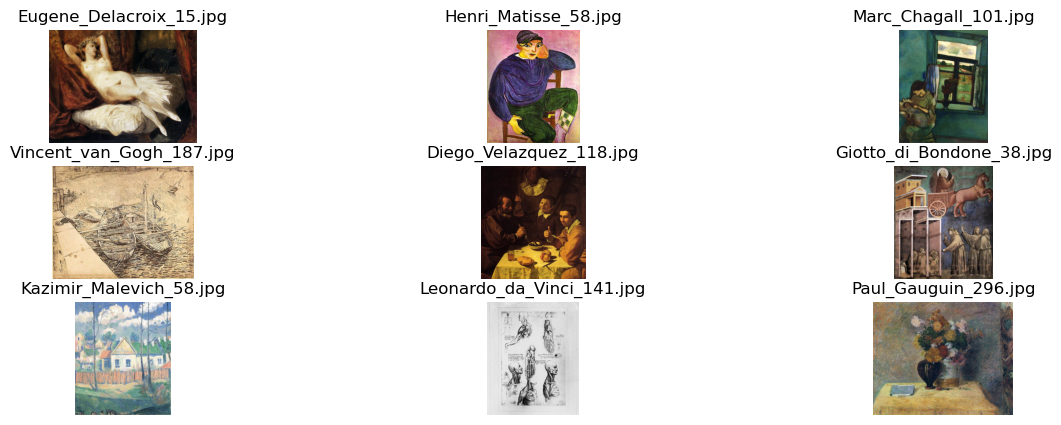

In [128]:
from tensorflow.keras.utils import load_img, img_to_array
fig,axe=plt.subplots(3,3,figsize=(15,5))

for i in range(3):
    for j in range(3):
        filename = rd.choice(total_df['filename'])
        img = load_img("data/" + filename)

          # Sélectionne une image appartenant à la classe k
        
        # Affiche l'image sur l'axe correspondant
        axe[i, j].imshow(img)  # Ajuster cmap selon vos images (ex: 'gray' pour images en niveaux de gris)
        axe[i, j].set_title(filename)  # Ajoute un titre pour chaque sous-graphe
        axe[i, j].axis('off')
    

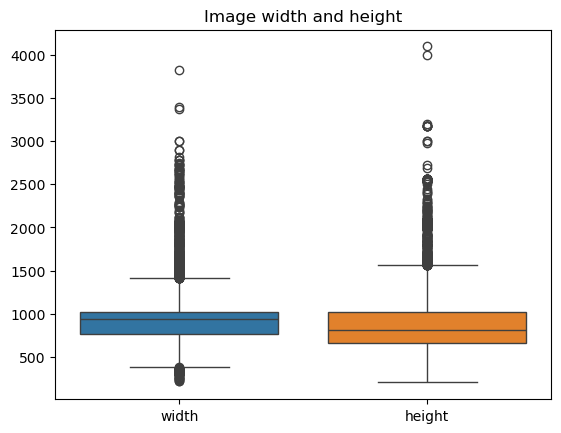

In [121]:
img_size = np.zeros((total_df.shape[0],2))
for i, filename in enumerate(total_df['filename']) :
    img = img_to_array( load_img("data/" + filename) )
    img_size[i,:] = img.shape[:2]

# --- #

plt.figure()
ax = sns.boxplot(img_size)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(['width', 'height'])
plt.title("Image width and height")
plt.show()

## Pretraitement

In [129]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(total_df, test_size=0.2, random_state=42)  # 80% train, 20% test



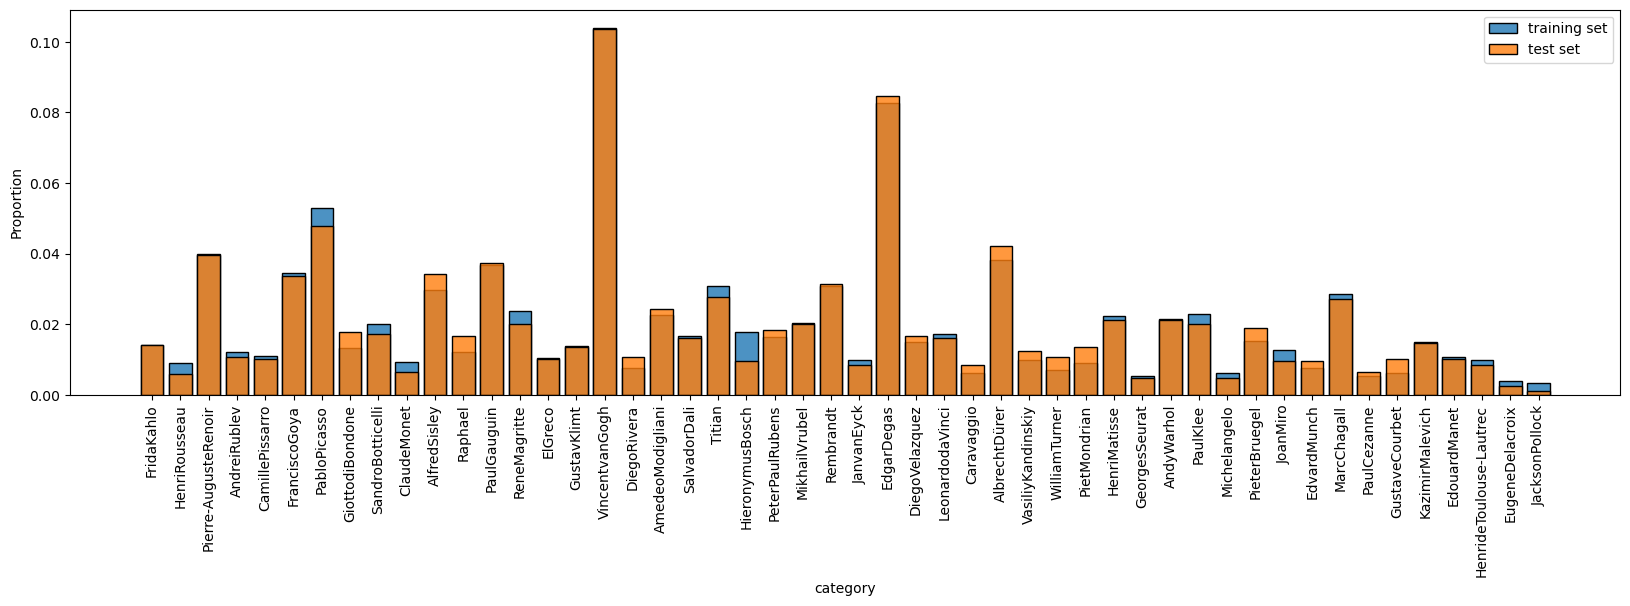

In [131]:
plt.figure(figsize=(20,5))

sns.histplot(train_df.iloc[:,1],stat='proportion',label="training set",discrete=True, alpha=.8, shrink=.8)
sns.histplot(test_df.iloc[:,1],stat='proportion',label="test set",discrete=True, alpha=.8, shrink=.8)
plt.xticks(rotation=90)
#sns.histplot(val_df.iloc[:,1],stat='proportion',label="val set",discrete=True, alpha=.8, shrink=.8)


plt.xticks(rotation=90)

plt.legend()

In [139]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


batch_size = 20  # d
img_width = 150
img_height = 150

# Training images
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    path + "data/",
    x_col = 'filename',
    y_col = 'category',
    target_size = (img_width, img_height),
    class_mode = 'binary',
    batch_size = batch_size
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    path + "data/",
    x_col = 'filename',
    y_col = 'category',
    target_size = (img_width, img_height),
    class_mode = 'binary',
    batch_size = batch_size
)

AttributeError: 'ImageDataGenerator' object has no attribute 'copy'